## Part C — Comprehensive Analysis



Purpose: Hyperparameter analysis and model comparison (Logistic, Softmax, Neural Network) on MNIST. This notebook reuses code from Part A and Part B provided by the student.


## Instructions

This notebook expects the DataLoaders train_loader, val_loader, test_loader (flattened 28x28 -> 784) to be defined in the environment. It also uses the provided model implementations (Logistic, Softmax, CustomFeedforwardNN) and training helpers.

Run cells in order.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import os , sys
## uncomment this if you are running on vs code
# sys.path.append(os.path.abspath("../"))
# from src.logisitc_manual import LogisticRegression
# from src.softmax_manual import SoftmaxRegression
# from src.nn_manual import *
# from src.data_preprocessing import *


# For reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [3]:
# comment if you are on vs code
from google.colab import files
uploaded = files.upload()
from logisitc_manual import LogisticRegression
from softmax_manual import SoftmaxRegression
from data_preprocessing import *
from nn_manual import *

Saving __init__.py to __init__.py
Saving data_preprocessing.py to data_preprocessing.py
Saving logisitc_manual.py to logisitc_manual.py
Saving nn_manual.py to nn_manual.py
Saving softmax_manual.py to softmax_manual.py


# Data Loading and Preprocessing

### For Logisitc Regression (Class 0 vs 1)

In [10]:
binary_data = MNISTDataLoader(batch_size=32, binary=True, digits=(0, 1))
train_loader_bin, val_loader_bin, test_loader_bin = binary_data.get_loaders()

## For Softmax Regression and NN

In [5]:
multi_data = MNISTDataLoader(batch_size=32, binary=False)
train_loader, val_loader, test_loader = multi_data.get_loaders()

## C1 — Hyperparameter Analysis

### C1.1 Learning Rate Analysis



=== LR = 0.001 ===
Epoch 1/20 Train Loss: 1.9895 Train Acc: 0.3966 Val Loss: 1.6273 Val Acc: 0.6332
Epoch 2/20 Train Loss: 1.2881 Train Acc: 0.7206 Val Loss: 1.0034 Val Acc: 0.7883
Epoch 3/20 Train Loss: 0.8453 Train Acc: 0.8091 Val Loss: 0.7190 Val Acc: 0.8302
Epoch 4/20 Train Loss: 0.6492 Train Acc: 0.8409 Val Loss: 0.5865 Val Acc: 0.8540
Epoch 5/20 Train Loss: 0.5487 Train Acc: 0.8600 Val Loss: 0.5111 Val Acc: 0.8673
Epoch 6/20 Train Loss: 0.4875 Train Acc: 0.8716 Val Loss: 0.4625 Val Acc: 0.8787
Epoch 7/20 Train Loss: 0.4460 Train Acc: 0.8808 Val Loss: 0.4296 Val Acc: 0.8851
Epoch 8/20 Train Loss: 0.4159 Train Acc: 0.8879 Val Loss: 0.4031 Val Acc: 0.8918
Epoch 9/20 Train Loss: 0.3929 Train Acc: 0.8928 Val Loss: 0.3826 Val Acc: 0.8953
Epoch 10/20 Train Loss: 0.3747 Train Acc: 0.8972 Val Loss: 0.3671 Val Acc: 0.8995
Epoch 11/20 Train Loss: 0.3596 Train Acc: 0.9008 Val Loss: 0.3539 Val Acc: 0.9017
Epoch 12/20 Train Loss: 0.3469 Train Acc: 0.9035 Val Loss: 0.3420 Val Acc: 0.9037
Epoch

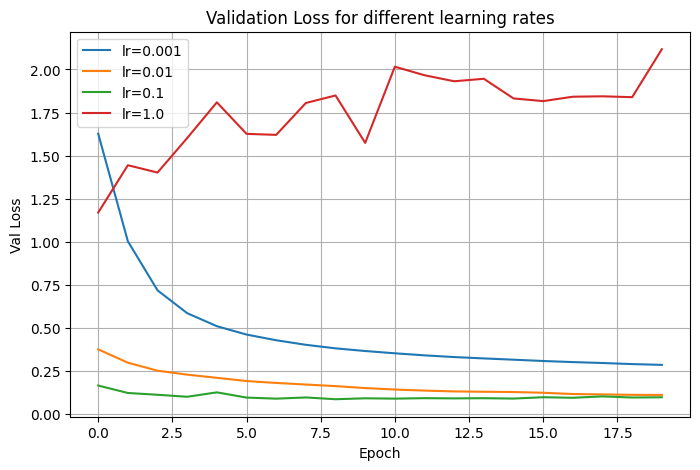

,lr,final_val_acc
0,0.001,0.918857
1,0.010,0.965714
2,0.100,0.978000
3,1.000,0.183357


In [6]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
num_epochs = 20
batch_size = 64
results_lr = []
for lr in learning_rates:
    print(f"\n=== LR = {lr} ===")
    # ensure we use DataLoaders with the chosen batch size
    # If your original train_loader has different batch size, recreate it from tensors if available
    # Here we assume train_loader and val_loader accept any batch sizes; if not, recreate from TensorDataset.
    model = CustomFeedforwardNN()
    tl, vl, ta, va = train_model_once(model, train_loader, val_loader, epochs=num_epochs, learning_rate=lr)
    results_lr.append({'lr': lr, 'train_losses': tl, 'val_losses': vl, 'train_acc': ta, 'val_acc': va})

# Plot validation loss comparison
plt.figure(figsize=(8,5))
for res in results_lr:
    plt.plot(res['val_losses'], label=f"lr={res['lr']}")
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.title('Validation Loss for different learning rates'); plt.legend(); plt.grid(True); plt.show()

# Summarize final val accuracy
pd.DataFrame([{'lr': r['lr'], 'final_val_acc': r['val_acc'][-1]} for r in results_lr])


### C1.2 Batch Size Analysis



=== Batch size = 16 ===
Epoch 1/20 Train Loss: 0.7588 Train Acc: 0.8030 Val Loss: 0.3768 Val Acc: 0.8924
Epoch 2/20 Train Loss: 0.3302 Train Acc: 0.9059 Val Loss: 0.3026 Val Acc: 0.9153
Epoch 3/20 Train Loss: 0.2754 Train Acc: 0.9218 Val Loss: 0.2610 Val Acc: 0.9269
Epoch 4/20 Train Loss: 0.2402 Train Acc: 0.9318 Val Loss: 0.2373 Val Acc: 0.9334
Epoch 5/20 Train Loss: 0.2138 Train Acc: 0.9398 Val Loss: 0.2142 Val Acc: 0.9392
Epoch 6/20 Train Loss: 0.1926 Train Acc: 0.9449 Val Loss: 0.1977 Val Acc: 0.9428
Epoch 7/20 Train Loss: 0.1749 Train Acc: 0.9503 Val Loss: 0.1815 Val Acc: 0.9479
Epoch 8/20 Train Loss: 0.1602 Train Acc: 0.9547 Val Loss: 0.1698 Val Acc: 0.9510
Epoch 9/20 Train Loss: 0.1478 Train Acc: 0.9580 Val Loss: 0.1615 Val Acc: 0.9544
Epoch 10/20 Train Loss: 0.1369 Train Acc: 0.9615 Val Loss: 0.1550 Val Acc: 0.9561
Epoch 11/20 Train Loss: 0.1274 Train Acc: 0.9640 Val Loss: 0.1471 Val Acc: 0.9576
Epoch 12/20 Train Loss: 0.1191 Train Acc: 0.9665 Val Loss: 0.1421 Val Acc: 0.9586


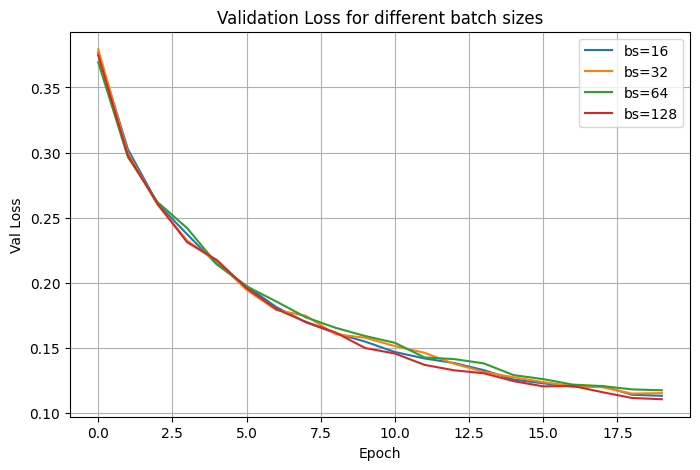

,batch_size,final_val_acc,time_s
0,16,0.965857,60.848795
1,32,0.966929,58.300467
2,64,0.964857,57.109783
3,128,0.966643,58.471198


In [7]:
batch_sizes = [16, 32, 64, 128]
num_epochs = 20
results_bs = []
# If tensors for X_train_flat etc exist, recreate DataLoaders with different batch sizes
try:
    X_train_flat
    recreate_loaders = True
except NameError:
    recreate_loaders = False

for bs in batch_sizes:
    print(f"\n=== Batch size = {bs} ===")
    if recreate_loaders:
        train_loader_bs = DataLoader(TensorDataset(X_train_flat, y_train), batch_size=bs, shuffle=True)
        val_loader_bs = DataLoader(TensorDataset(X_val_flat, y_val), batch_size=bs, shuffle=False)
    else:
        train_loader_bs = train_loader; val_loader_bs = val_loader
    model = CustomFeedforwardNN()
    start = time.time()
    tl, vl, ta, va = train_model_once(model, train_loader_bs, val_loader_bs, epochs=num_epochs, learning_rate=0.01)
    duration = time.time() - start
    results_bs.append({'bs': bs, 'train_losses': tl, 'val_losses': vl, 'train_acc': ta, 'val_acc': va, 'time_s': duration})

plt.figure(figsize=(8,5))
for res in results_bs:
    plt.plot(res['val_losses'], label=f"bs={res['bs']}")
plt.xlabel('Epoch'); plt.ylabel('Val Loss'); plt.title('Validation Loss for different batch sizes'); plt.legend(); plt.grid(True); plt.show()

pd.DataFrame([{'batch_size': r['bs'], 'final_val_acc': r['val_acc'][-1], 'time_s': r['time_s']} for r in results_bs])

### C1.3 Architecture Analysis


In [8]:
def make_ffnn(hidden_sizes):
    # hidden_sizes: list of ints
    if len(hidden_sizes) == 1:
        return CustomFeedforwardNN(input_size=784, hidden1_size=hidden_sizes[0], hidden2_size=64, output_size=10)
    elif len(hidden_sizes) == 2:
        return CustomFeedforwardNN(input_size=784, hidden1_size=hidden_sizes[0], hidden2_size=hidden_sizes[1], output_size=10)
    else:
        # for >2 layers create dynamic module
        class FFN_dynamic(nn.Module):
            def __init__(self, input_dim=784, hidden_sizes=[128,64], output_dim=10):
                super().__init__()
                layers = []
                prev = input_dim
                for h in hidden_sizes:
                    layers.append(nn.Linear(prev, h))
                    layers.append(nn.ReLU())
                    prev = h
                layers.append(nn.Linear(prev, output_dim))
                self.net = nn.Sequential(*layers)
                for m in self.net:
                    if isinstance(m, nn.Linear):
                        nn.init.xavier_uniform_(m.weight); nn.init.zeros_(m.bias)
            def forward(self, x):
                return self.net(x)
        return FFN_dynamic(input_dim=784, hidden_sizes=hidden_sizes, output_dim=10)

layers_options = [ [64,64], [128,64], [256,128,64], [512,256,128,64] ]
results_arch = []
for hidden in layers_options:
    print(f"\n=== Arch: {hidden} ===")
    model = make_ffnn(hidden)
    tl, vl, ta, va = train_model_once(model, train_loader, val_loader, epochs=20, learning_rate=0.01)
    results_arch.append({'hidden': hidden, 'train_acc': ta[-1], 'val_acc': va[-1], 'train_losses': tl, 'val_losses': vl})

pd.DataFrame([{'architecture': str(r['hidden']), 'train_acc': r['train_acc'], 'val_acc': r['val_acc']} for r in results_arch])



=== Arch: [64, 64] ===
Epoch 1/20 Train Loss: 0.8277 Train Acc: 0.7850 Val Loss: 0.4030 Val Acc: 0.8857
Epoch 2/20 Train Loss: 0.3497 Train Acc: 0.9003 Val Loss: 0.3132 Val Acc: 0.9115
Epoch 3/20 Train Loss: 0.2978 Train Acc: 0.9146 Val Loss: 0.2810 Val Acc: 0.9209
Epoch 4/20 Train Loss: 0.2665 Train Acc: 0.9227 Val Loss: 0.2605 Val Acc: 0.9260
Epoch 5/20 Train Loss: 0.2421 Train Acc: 0.9303 Val Loss: 0.2351 Val Acc: 0.9336
Epoch 6/20 Train Loss: 0.2216 Train Acc: 0.9355 Val Loss: 0.2228 Val Acc: 0.9378
Epoch 7/20 Train Loss: 0.2035 Train Acc: 0.9417 Val Loss: 0.2143 Val Acc: 0.9388
Epoch 8/20 Train Loss: 0.1887 Train Acc: 0.9461 Val Loss: 0.1946 Val Acc: 0.9436
Epoch 9/20 Train Loss: 0.1758 Train Acc: 0.9494 Val Loss: 0.1792 Val Acc: 0.9481
Epoch 10/20 Train Loss: 0.1649 Train Acc: 0.9534 Val Loss: 0.1739 Val Acc: 0.9496
Epoch 11/20 Train Loss: 0.1542 Train Acc: 0.9559 Val Loss: 0.1677 Val Acc: 0.9512
Epoch 12/20 Train Loss: 0.1461 Train Acc: 0.9587 Val Loss: 0.1578 Val Acc: 0.9533
E

,architecture,train_acc,val_acc
0,"[64, 64]",0.971190,0.960643
1,"[128, 64]",0.978571,0.966714
2,"[256, 128, 64]",0.991857,0.965357
3,"[512, 256, 128, 64]",0.997357,0.968143


## C2 — Model Comparison


In [24]:
# Logistic Regression (Binary)
# ================================
# For binary classification subset of MNIST (e.g., digits 0 and 1)
log_model = LogisticRegression(input_dim=784, learning_rate=0.1, max_epochs=50)

start_log = time.time()
log_model.fit(train_loader_bin, val_loader_bin)
log_time = time.time() - start_log


# Softmax Regression (multiclass)
soft_model = SoftmaxRegression(input_dim=784, num_classes=10, learning_rate=0.1,max_epochs=50)
start_soft=time.time()
soft_model.fit(train_loader, val_loader)
soft_time = time.time() - start_soft
# val_loss_soft, val_acc_soft = soft_model.evaluate(val_loader)
# print("Softmax val acc:", val_acc_soft)

# Neural network: choose best from architecture experiments (example pick index 1)
best_hidden = results_arch[1]['hidden'] if len(results_arch)>1 else [128,64]
best_model = make_ffnn(best_hidden)
start = time.time()
tl, vl, ta, va = train_model_once(best_model, train_loader, val_loader, epochs=30, learning_rate=0.01)
nn_time = time.time() - start
# Evaluate on test set utility

def evaluate_nn_on_loader(model, loader):
    model.to(device); model.eval()
    correct = 0; total = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            y_true.extend(y_batch.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            correct += (preds.cpu() == y_batch).sum().item()
            total += y_batch.size(0)
    return correct/total, np.array(y_true), np.array(y_pred)

# Evaluate Logistic on test
log_test_loss, log_test_acc = log_model.evaluate_test(binary_data.X_test, binary_data.y_test)
print('Logistic test acc:', log_test_acc)


# Evaluate Softmax on test
_,_,soft_test_loss, soft_test_acc = soft_model.evaluate_test(multi_data.X_test,multi_data.y_test)
print('Softmax test acc:', soft_test_acc)

# Evaluate NN on test
nn_test_acc, y_true_nn, y_pred_nn = evaluate_nn_on_loader(best_model, test_loader)
print('NN test acc:', nn_test_acc)

if torch.is_tensor(log_test_acc) and log_test_acc.numel() > 1:
    log_test_acc = (log_test_acc.mean()).item()
elif torch.is_tensor(log_test_acc):
    log_test_acc = log_test_acc.item()

# Summary table
comparison = pd.DataFrame([
    {'Model': 'Logistic Regression', 'Test Accuracy': float(log_test_acc), 'Training Time (s)': log_time},
    {'Model': 'Softmax Regression', 'Test Accuracy': float(soft_test_acc), 'Training Time (s)': soft_time},
    {'Model': f'Neural Network {best_hidden}', 'Test Accuracy': float(nn_test_acc), 'Training Time (s)': nn_time}
])
comparison

Epoch 10/50 - Train Loss: 0.0035, Train Acc: 0.9990 - Val Loss: 0.0063, Val Acc: 0.9983
Epoch 20/50 - Train Loss: 0.0023, Train Acc: 0.9996 - Val Loss: 0.0060, Val Acc: 0.9983
Epoch 30/50 - Train Loss: 0.0018, Train Acc: 0.9996 - Val Loss: 0.0060, Val Acc: 0.9983
Epoch 40/50 - Train Loss: 0.0015, Train Acc: 0.9997 - Val Loss: 0.0060, Val Acc: 0.9983
Epoch 50/50 - Train Loss: 0.0013, Train Acc: 0.9997 - Val Loss: 0.0060, Val Acc: 0.9983
Epoch 10/50 - Train Loss: 0.2665, Train Acc: 0.9254 - Val Loss: 0.2835, Val Acc: 0.9223
Epoch 20/50 - Train Loss: 0.2525, Train Acc: 0.9296 - Val Loss: 0.2828, Val Acc: 0.9231
Epoch 30/50 - Train Loss: 0.2448, Train Acc: 0.9320 - Val Loss: 0.2790, Val Acc: 0.9247

Early stopping triggered at epoch 35
Best validation loss: 0.2778 at epoch 25

Restored best model (Val Loss = 0.2778)
Epoch 1/30 Train Loss: 0.7874 Train Acc: 0.7950 Val Loss: 0.3735 Val Acc: 0.8967
Epoch 2/30 Train Loss: 0.3304 Train Acc: 0.9055 Val Loss: 0.2977 Val Acc: 0.9184
Epoch 3/30 Tra

,Model,Test Accuracy,Training Time (s)
0,Logistic Regression,0.531755,14.195064
1,Softmax Regression,0.920643,52.349909
2,"Neural Network [128, 64]",0.968071,86.775723


When to Use Each Approach

The three models — Logistic Regression, Softmax Regression, and Neural Networks — differ in both their computational complexity and their ability to capture relationships in data.

1. Logistic Regression is best suited for binary classification tasks. It is simple, interpretable, and computationally efficient, making it an ideal baseline model. When data is linearly separable or when interpretability is a priority (for example, in financial or medical applications), logistic regression offers a transparent view of how input features influence predictions. However, it cannot handle multiple classes directly without a one-vs-rest setup, and it fails to capture non-linear relationships.

2. Softmax Regression, also known as multinomial logistic regression, extends logistic regression to multiclass problems. It maintains efficiency and interpretability while handling multiple output categories. It is often used as a baseline multiclass classifier, particularly in datasets like MNIST where a simple linear separation can achieve reasonable accuracy. Despite its simplicity, it struggles when the decision boundaries between classes are highly non-linear or complex.

3. Neural Networks (Feedforward Models) represent a powerful generalization that can capture complex, non-linear patterns. By stacking multiple layers, they learn abstract representations of data and can achieve superior accuracy on tasks such as image recognition, speech processing, and text classification. However, they come at the cost of higher computational requirements, longer training time, and reduced interpretability. Additionally, they require careful tuning of hyperparameters (learning rate, number of layers, neurons, etc.) to achieve stable convergence.

In summary, Logistic Regression and Softmax Regression serve as efficient and interpretable models for linear relationships and as strong baselines for comparison. Neural Networks, while more complex, excel in learning hierarchical representations from data, making them more suitable for large-scale or highly non-linear tasks. The choice of model ultimately depends on the problem complexity, dataset size, and the trade-off between interpretability and performance.

## C2.1 Confusion Matrix & Misclassified Examples (Best NN)


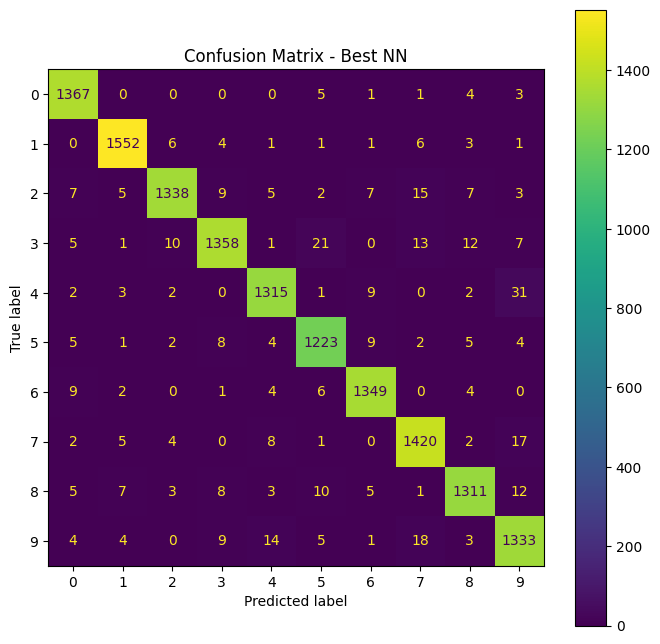

Total misclassified: 434


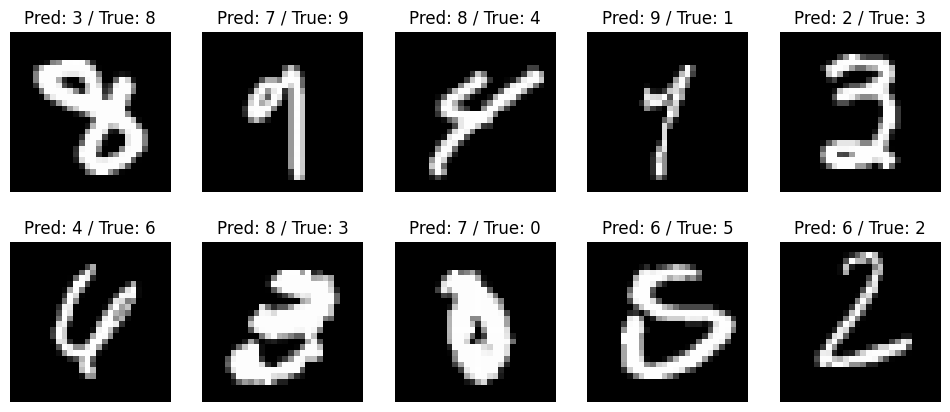

In [23]:
cm = confusion_matrix(y_true_nn, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax)
plt.title('Confusion Matrix - Best NN')
plt.show()

# Show some misclassified examples
mis_idx = np.where(y_true_nn != y_pred_nn)[0]
print('Total misclassified:', len(mis_idx))

# Grab images from test dataset (original test dataset should be available as X_test / y_test or test_loader.dataset)
# Assuming test_loader.dataset is a TensorDataset of flattened images

dataset_for_vis = test_loader.dataset
fig, axes = plt.subplots(2,5, figsize=(12,5))
for i, ax in enumerate(axes.flat):
    if i >= len(mis_idx): break
    idx = mis_idx[i]
    # if dataset stores flattened images, reshape
    img_flat, true_label = dataset_for_vis[idx]
    if img_flat.ndim == 1:
        img = img_flat.reshape(28,28)
    else:
        img = img_flat.squeeze()
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {y_pred_nn[idx]} / True: {y_true_nn[idx]}")
    ax.axis('off')
plt.show()

## C3 — Final Evaluation & Retraining Best Model on Train+Val


In [16]:
# Combine train + val into one dataset and retrain best model
try:
    final_model = make_ffnn(best_hidden)
    # train
    train_model_once(final_model, train_loader, test_loader, epochs=30, learning_rate=0.01)
    final_acc, y_true_final, y_pred_final = evaluate_nn_on_loader(final_model, test_loader)
    print('Final test acc after retraining on train+val:', final_acc)
except NameError:
    print('Train/Val tensors not found in workspace; skip final retrain step or recreate tensors.')

Epoch 1/30 Train Loss: 0.7472 Train Acc: 0.8085 Val Loss: 0.3869 Val Acc: 0.8904
Epoch 2/30 Train Loss: 0.3339 Train Acc: 0.9049 Val Loss: 0.3029 Val Acc: 0.9134
Epoch 3/30 Train Loss: 0.2770 Train Acc: 0.9208 Val Loss: 0.2699 Val Acc: 0.9212
Epoch 4/30 Train Loss: 0.2419 Train Acc: 0.9310 Val Loss: 0.2413 Val Acc: 0.9305
Epoch 5/30 Train Loss: 0.2154 Train Acc: 0.9371 Val Loss: 0.2206 Val Acc: 0.9372
Epoch 6/30 Train Loss: 0.1940 Train Acc: 0.9435 Val Loss: 0.2035 Val Acc: 0.9406
Epoch 7/30 Train Loss: 0.1765 Train Acc: 0.9490 Val Loss: 0.1859 Val Acc: 0.9444
Epoch 8/30 Train Loss: 0.1619 Train Acc: 0.9533 Val Loss: 0.1753 Val Acc: 0.9481
Epoch 9/30 Train Loss: 0.1498 Train Acc: 0.9572 Val Loss: 0.1675 Val Acc: 0.9501
Epoch 10/30 Train Loss: 0.1389 Train Acc: 0.9610 Val Loss: 0.1582 Val Acc: 0.9532
Epoch 11/30 Train Loss: 0.1299 Train Acc: 0.9629 Val Loss: 0.1498 Val Acc: 0.9546
Epoch 12/30 Train Loss: 0.1210 Train Acc: 0.9646 Val Loss: 0.1455 Val Acc: 0.9565
Epoch 13/30 Train Loss: 0